In [16]:
import sqlite3
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import math

%matplotlib inline

In [21]:
DATASET_ROOT='/var/data/AFLW/aflw/data/'
db_dir = DATASET_ROOT+'aflw.sqlite'

con = sqlite3.connect(db_dir)
cursor = con.cursor()

res = con.execute("SELECT name FROM sqlite_master WHERE type='table';")

In [22]:
for name in res:
    print(name[0])

Faces
sqlite_sequence
FacePose
FaceImages
Databases
FaceMetaData
sqlite_stat1
FaceRect
AnnotationType
FaceEllipse
NearDuplicates
FeatureCoords
FeatureCoordTypes
CamPose


In [23]:
def get_image_list():
    return pd.read_sql_query("SELECT file_id FROM FaceImages", con).as_matrix()

def drawing(image_name, ellipse=True):
    faces = pd.read_sql_query("SELECT face_id, file_id FROM Faces",con)
    images = pd.read_sql_query("SELECT file_id, filepath FROM FaceImages", con)
    ellip = pd.read_sql_query("SELECT face_id , x, y, ra, rb, theta FROM FaceEllipse",con)
    rect = pd.read_sql_query("SELECT face_id , x, y, w, h FROM FaceRect",con)
    
    fid = faces.face_id[(list(faces.file_id.as_matrix()).index(image_name))]
    img_path = images.filepath[(list(images.file_id.as_matrix()).index(image_name))]
    e_idx=list(ellip.face_id.as_matrix()).index(fid)
    r_idx=list(rect.face_id.as_matrix()).index(fid)
    
    img = cv2.imread(DATASET_ROOT+"flickr/"+img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    thickness = math.ceil(sum(img.shape[0:2])/300)
    if ellipse:
        img=cv2.ellipse(img,
                        (int(ellip["x"][e_idx]),int(ellip["y"][e_idx])),
                        (int(ellip["rb"][e_idx]),int(ellip["ra"][e_idx])),
                        0,0,360,255, thickness)
    return img

In [24]:
name_list=get_image_list()

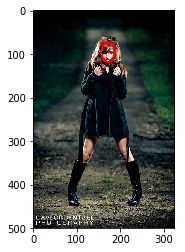

In [25]:
plt.imshow(drawing(name_list[1000]))